## Discrete time fourier transform



In [14]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nitime.utils as utils
import nitime.timeseries as ts
import nitime.viz as viz

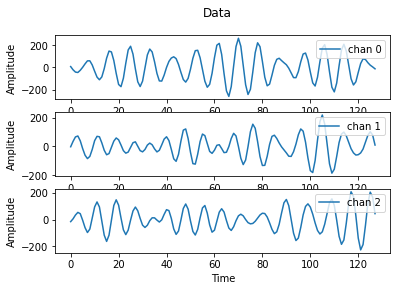

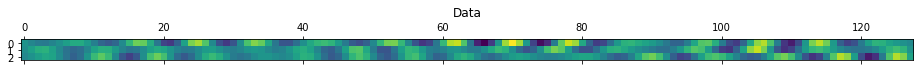

In [15]:
def get_data(N, d):
    """
    generate synthetic data
    Args:
        N: number of samples
        d: number of channels

    Returns: ndarray (N, d)

    """
    data = []
    fig, axes = plt.subplots(d)
    fig.suptitle('Data')
    for chan_idx in range(d):
        ar_seq, nz, coefs = utils.ar_generator(N, sigma=10, drop_transients=10)
        ar_seq -= ar_seq.mean()
        sample = np.ones(ar_seq.shape[-1]) + ar_seq
        sample_noise = np.random.randn(N)
        sample = sample + sample_noise
        data.append(sample)
        axes[chan_idx].plot(sample, label=f'chan {chan_idx}')
        axes[chan_idx].set_xlabel('Time')
        axes[chan_idx].set_ylabel('Amplitude')
        axes[chan_idx].legend(loc='upper right')
    return np.array(data)


# Time (s)
T = 1
# Sample freq (Hz)
fs = 128
# Number of channels
d = 3
# Number of samples
N = T * fs

# get data and visualize channels
data = get_data(N, d)
# plt.show()


plt.matshow(data)
plt.title('Data')
plt.show()



In [16]:
def DFT(x, fs):
    """
    Return the Discrete Fourier Transform of a multivariate times series x.
    Args:
        x: (d, N) ndarray
        fs: frequency (Hz)
    Returns: X: (N, 2) DFT(x)

    """
    N = x.shape[-1]
    x = x.T
    X = np.array([sum([x[n] * np.exp((-1j * 2 * np.pi / N) * k * n) for n in range(N)]) for k in range(N)])
    return X

dft_euclidean = DFT(data, 10)

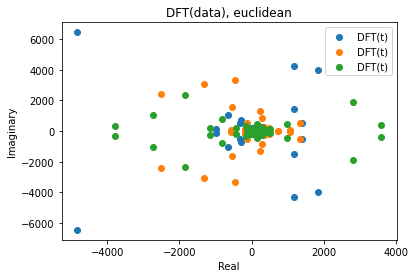

In [24]:
plt.title('DFT(data), euclidean')
for i in range(d):
    plt.scatter(dft_euclidean.real[:,i], dft_euclidean.imag[:,i], label='DFT(t)')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend()
plt.show()

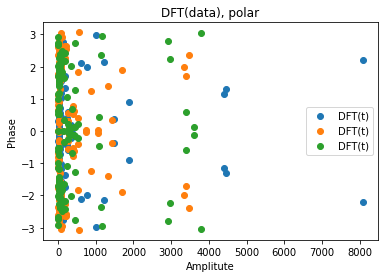

In [25]:
polar2z = lambda r,θ: r * np.exp( 1j * θ )
z2polar = lambda z: ( np.abs(z), np.angle(z) )

dft_polar_r, dft_polar_θ = z2polar(dft_euclidean)

plt.title('DFT(data), polar')
for i in range(d):
    plt.scatter(dft_polar_r[:, i], dft_polar_θ[:, i], label='DFT(t)')
plt.xlabel('Amplitute')
plt.ylabel('Phase')
plt.legend()
plt.show()